# Intro

Global Temperature data link: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land_ocean/ytd/2/1998-2024?trend=true&trend_base=10&begtrendyear=1998&endtrendyear=2024&filter=true&filterType=loess
global anomalies are with respect to the 1901-2000 average


Global Storm data link: https://tropical.atmos.colostate.edu/Realtime/index.php?arch&loc=global





# Data Processing

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url1='https://github.com/yinaS1234/data-608/raw/main/S5/global%20temp.csv'
url2='https://github.com/yinaS1234/data-608/raw/main/S5/storms.csv'
def load_summary_info(url):
    df=pd.read_csv(url)
    print(df.info())
    print(df.describe(include='all'))
    print(df.isnull().any())
    print(df.duplicated())
    print(df.columns)
    return df

temp=load_summary_info(url1)
storm=load_summary_info(url2)
m=pd.merge(temp,storm,on='Year', how='outer')
m.rename(columns={'Anomaly':'Diff From Average(°C)'}, inplace=True)
m['Mighty Storm Ratio']=round(m['Cat. 3+ Hurricanes']/m['Named Storms'],2)
m.info()
m=m[m['Year']>=1999]
df_sorted = m.sort_values(by='Diff From Average(°C)', ascending=False)
warmest = df_sorted.head(1)['Year'].tolist()
warmest

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     44 non-null     int64  
 1   Anomaly  44 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 836.0 bytes
None
              Year    Anomaly
count    44.000000  44.000000
mean   2001.500000   0.557273
std      12.845233   0.250658
min    1980.000000   0.140000
25%    1990.750000   0.340000
50%    2001.500000   0.550000
75%    2012.250000   0.705000
max    2023.000000   1.050000
Year       False
Anomaly    False
dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    Fals

[2023]

# Visuals

/var/folders/61/8qjm5s6j2fl8bysl8s88t0vw0000gp/T/ipykernel_1257/2606070905.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year',y='Diff From Average(°C)', data=m, palette=['orange' if year in warmest else 'skyblue' for year in m.Year])


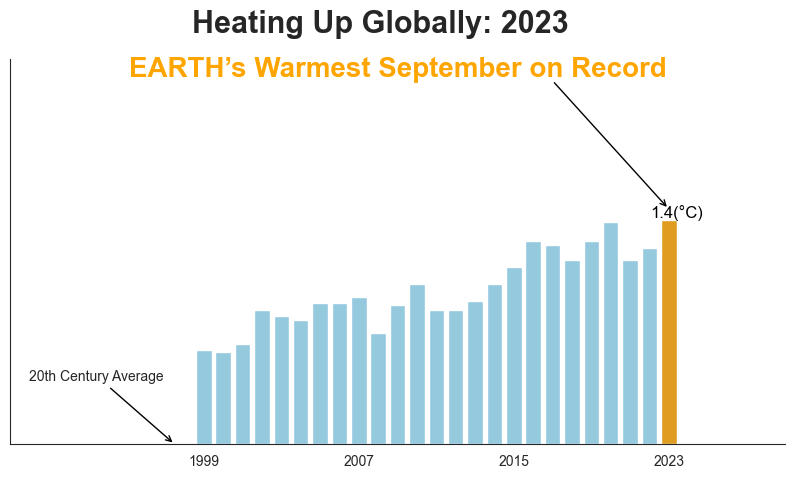

In [113]:
sns.set_style('white')
fig, ax=plt.subplots(figsize=(10,5))
sns.barplot(x='Year',y='Diff From Average(°C)', data=m, palette=['orange' if year in warmest else 'skyblue' for year in m.Year])

fig.suptitle('Heating Up Globally: 2023 ', fontsize=22, fontweight='bold')
ax.set_xlabel('')
xticks = list(range(0, len(m['Year']), 8))
if xticks[-1] != len(m['Year']) - 1: 
    xticks.append(len(m['Year'])-1)
ax.set_xticks(xticks)
ax.set_ylabel('')
ax.set_yticklabels('')
ax.set_title('EARTH’s Warmest September on Record', fontsize=20,fontweight='bold', color='orange', pad=-12 )

ax.set_xlim(-10, len(m['Year'])+5)
ax.set_ylim(0, 1.8)
ax.annotate('20th Century Average',
            xy=(-1.5,0),
            xytext=(-9,0.3),
            arrowprops=dict(edgecolor='black',arrowstyle='->'),
            fontsize=10
            )

ax.annotate('',
            xy=(24,1.1),
            xytext=(18,1.7),
            arrowprops=dict(edgecolor='black',arrowstyle='->'),
            fontsize=10
            )

ax.text(24.4,1.12,'1.4(°C)' ,ha='center',va='top',color='black',fontsize=12)
sns.despine()




(4.0, 58.0)

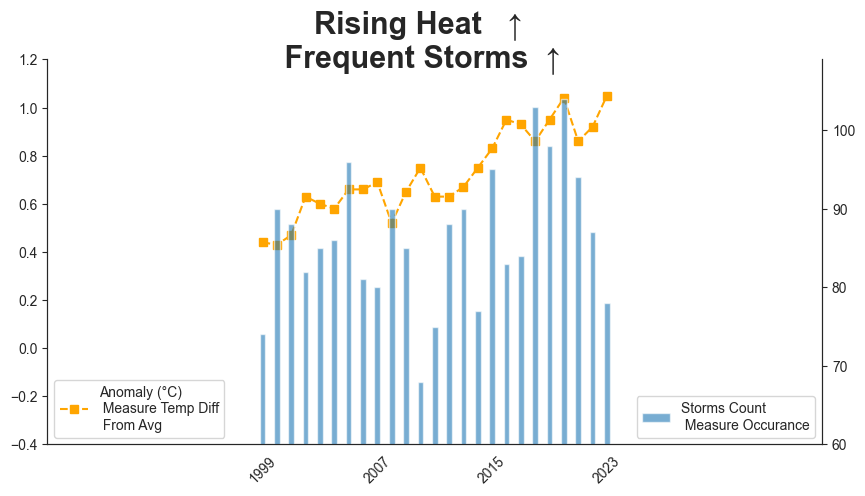

In [151]:

sns.set_style('white')

fig, ax1 = plt.subplots(figsize=(10, 5))


ax1.plot(m.index, m['Diff From Average(°C)'], color='orange', marker='s', linestyle='--', label='Anomaly (°C)\n Measure Temp Diff\n From Avg')
ax1.set_ylabel('', color='orange')
ax1.set_ylim(-0.4, max(m['Diff From Average(°C)']) + 0.15)  
ax2 = ax1.twinx()


ax2.bar(m.index, m['Named Storms'], width=0.4, label='Storms Count\n Measure Occurance', alpha=0.6)
ax2.set_ylabel('')
ax2.set_ylim(60, max(m['Named Storms']) + 5)  


ax1.set_xticks(m.index)
ax1.set_xticklabels(m['Year'], rotation=45)

for index, label in enumerate(ax1.get_xticklabels()):
    if index % 8 != 0:
        label.set_visible(False)


fig.suptitle('Rising Heat   ↑ \n Frequent Storms  ↑ ', fontsize=22, fontweight='bold')

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
sns.despine(right=False) 
ax1.set_xlim(m.index.min() - 15, m.index.max() + 15) 


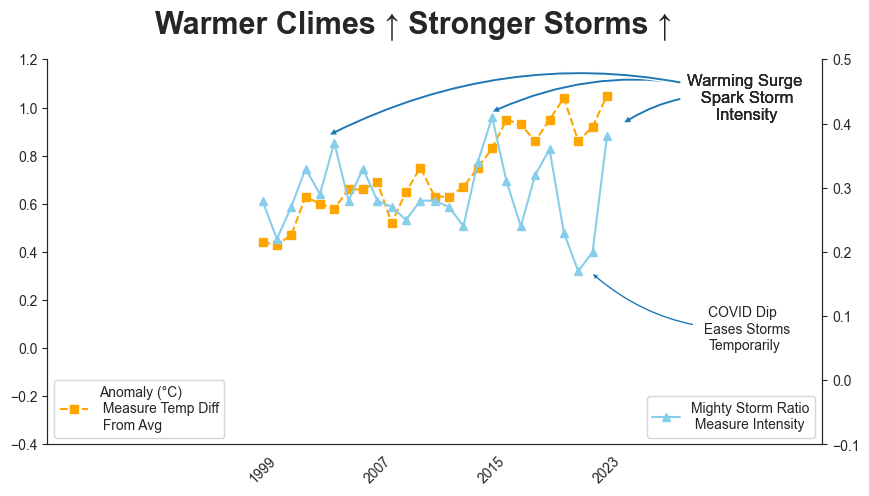

In [152]:

sns.set_style('white')


fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(m.index, m['Diff From Average(°C)'], color='orange', marker='s', linestyle='--', label='Anomaly (°C)\n Measure Temp Diff\n From Avg')
ax1.set_ylabel('')
ax1.set_ylim(-0.4, 1.2)

ax2 = ax1.twinx()

ax2.plot(m.index, m['Mighty Storm Ratio'], color='skyblue', marker='^', linestyle='-', label='Mighty Storm Ratio\n Measure Intensity')
ax2.set_ylabel('')
ax2.set_ylim(-0.1, 0.5)


ax1.set_xticks(m.index)
ax1.set_xticklabels(m['Year'], rotation=45)


for index, label in enumerate(ax1.get_xticklabels()):
    if index % 8 != 0:
        label.set_visible(False)


fig.suptitle('Warmer Climes ↑ Stronger Storms ↑  ', fontsize=22, fontweight='bold')


ax1.legend(loc='lower left')
ax2.legend(loc='lower right')


sns.despine(right=False)

ax1.set_xlim(m.index.min() - 15, m.index.max() + 15)



ax1.annotate("Warming Surge\n Spark Storm\n Intensity",
            xy=(0.57, 0.86), xycoords='axes fraction',
            xytext=(0.9, 0.9), textcoords='axes fraction',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"))
ax1.annotate("Warming Surge\n Spark Storm\n Intensity",
            xy=(0.36, 0.8), xycoords='axes fraction',
            xytext=(0.9, 0.9), textcoords='axes fraction',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"))
ax1.annotate("Warming Surge\n Spark Storm\n Intensity",
            xy=(0.74, 0.83), xycoords='axes fraction',
            xytext=(0.9, 0.9), textcoords='axes fraction',
            size=12, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2"))

ax2.annotate("COVID Dip \n Eases Storms\nTemporarily",
            xy=(0.7, 0.45), xycoords='axes fraction',
            xytext=(0.9, 0.3), textcoords='axes fraction',
            size=10, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2"))

plt.show()


Rising Earth temperatures are associated with an increase in the occurrence and intensity of cyclonic storms (hurricanes, typhoons, and tornadoes). This is likely due to factors like warmer ocean waters providing more energy for storm formation and increased moisture in the atmosphere leading to heavier rainfall. 